In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime


/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File


In [2]:
nameCSV = 'innis_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2662

## Calculate mean value of each satellite track 

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2394


## Make ndarray(alltime) and list(days2) that has dates

In [5]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [35]:
netCDF4.num2date(tt[days],u'days since 1985-01-01 00:00:00 UTC')

array([datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
       datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
       datetime.datetime(1985, 4, 8, 21, 35, 6, 187500), ...,
       datetime.datetime(2019, 2, 9, 1, 11, 43, 638834),
       datetime.datetime(2019, 2, 10, 13, 55, 59, 960156),
       datetime.datetime(2019, 2, 18, 23, 10, 14, 196875)], dtype=object)

In [6]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

2.1770000457763667 1985-03-31 08:13:46.832721
0.29100000858306885 1985-04-05 21:26:15.503909
2.1640000343322754 1985-04-08 21:35:06.187500
1.579800009727478 1985-04-23 09:53:29.146876
2.3106002807617188 1985-05-16 11:33:14.298438
0.4826667308807373 1985-07-30 16:49:35.815105
1.2717777490615845 1985-08-22 18:29:05.607639
0.4731818437576294 1985-09-14 20:08:44.546877
0.4109000265598297 1985-09-23 09:29:54.689844
2.001000165939331 1985-10-07 21:48:02.343750
1.241000056266785 1985-10-30 23:27:24.464844
1.731545329093933 1985-11-02 23:36:09.269886
1.1175554990768433 1985-11-08 12:48:30.101562
0.5516666769981384 1985-11-26 01:15:21.096897
0.7686000466346741 1986-01-11 04:33:36.420703
0.6541999578475952 1986-01-19 17:54:59.206250
1.075285792350769 1986-02-03 06:12:35.508371
1.744444489479065 1986-03-01 08:00:17.441840
2.001062393188477 1986-03-24 09:39:13.101562
2.3270528316497803 1986-04-16 11:18:06.899671
0.5181428790092468 1986-05-09 12:56:55.488838
2.768230676651001 1986-06-01 14:35:32.74

1.0659375190734863 2005-09-07 23:04:05.677086
2.164928674697876 2005-09-17 23:58:02.883929
1.704142928123474 2005-09-18 12:22:44.556249
0.5398000478744507 2005-09-25 00:16:53.214029
2.3951666355133057 2005-10-04 12:19:54.158854
1.7498637437820437 2005-10-07 00:00:56.004601
1.0847142934799194 2005-10-12 01:29:39.031251
1.2299333810806274 2005-10-22 23:58:06.531250
0.9013636112213136 2005-10-23 12:22:46.549717
2.1507999897003174 2005-10-29 02:42:23.402623
1.1954667568206787 2005-11-08 12:19:55.921876
1.2094001770019531 2005-11-11 00:00:57.430691
1.2932000160217283 2005-11-15 03:55:11.693360
1.7930667400360107 2005-11-26 23:57:58.381249
2.272181749343872 2005-11-27 12:22:42.166993
0.7914286255836487 2005-12-13 12:19:52.003347
2.1668002605438232 2005-12-16 00:00:50.692199
1.5116000175476074 2005-12-17 12:05:18.243653
0.7204999923706055 2005-12-19 06:20:46.781248
0.6234666705131531 2005-12-31 23:57:54.550000
1.443818211555481 2006-01-01 12:22:34.546875
0.5588333606719971 2006-01-05 07:33:36

1.8874617356520436 2013-07-21 08:43:54.989430
1.4859001159667968 2013-07-26 20:21:52.792279
1.064900016784668 2013-07-27 06:10:48.635742
1.1252500534057617 2013-07-28 18:55:07.006250
1.858000138226677 2013-08-06 04:09:19.397070
2.424949836730957 2013-08-07 16:53:37.719532
2.4750000448787914 2013-08-16 02:07:50.916308
0.6268500328063965 2013-08-17 07:21:20.884765
0.5051428590502057 2013-08-17 14:52:09.250000
1.278500123457475 2013-08-19 07:18:49.872244
0.5919091484763406 2013-08-24 18:56:46.899816
0.3555263218126799 2013-08-26 00:06:23.354278
0.9883999824523926 2013-08-27 12:50:41.561719
2.7720000743865967 2013-09-04 22:04:55.514844
3.1444499969482416 2013-09-14 20:03:27.195313
2.0638097127278647 2013-09-16 08:47:45.889063
2.9463752110799155 2013-09-16 16:16:31.967222
0.7566500663757324 2013-09-20 17:34:17.109374
0.5779444906446669 2013-09-22 17:31:43.152344
0.8486000061035156 2013-09-24 18:01:58.845312
0.6278000354766846 2013-09-26 06:46:17.105664
0.7978571483067104 2013-10-04 16:00:30

In [34]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(days2)

Number of Satellite Tracks: 2394


In [8]:
days2

[datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
 datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
 datetime.datetime(1985, 4, 8, 21, 35, 6, 187500),
 datetime.datetime(1985, 4, 23, 9, 53, 29, 146876),
 datetime.datetime(1985, 5, 16, 11, 33, 14, 298438),
 datetime.datetime(1985, 7, 30, 16, 49, 35, 815105),
 datetime.datetime(1985, 8, 22, 18, 29, 5, 607639),
 datetime.datetime(1985, 9, 14, 20, 8, 44, 546877),
 datetime.datetime(1985, 9, 23, 9, 29, 54, 689844),
 datetime.datetime(1985, 10, 7, 21, 48, 2, 343750),
 datetime.datetime(1985, 10, 30, 23, 27, 24, 464844),
 datetime.datetime(1985, 11, 2, 23, 36, 9, 269886),
 datetime.datetime(1985, 11, 8, 12, 48, 30, 101562),
 datetime.datetime(1985, 11, 26, 1, 15, 21, 96897),
 datetime.datetime(1986, 1, 11, 4, 33, 36, 420703),
 datetime.datetime(1986, 1, 19, 17, 54, 59, 206250),
 datetime.datetime(1986, 2, 3, 6, 12, 35, 508371),
 datetime.datetime(1986, 3, 1, 8, 0, 17, 441840),
 datetime.datetime(1986, 3, 24, 9, 39, 13, 101562),
 datetime.

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [10]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [11]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[7.21842117 3.84835449 6.06049484 ... 5.92469211 6.59358157 5.14627429]
2662 2662


In [12]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

2394
2394


In [16]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz})
df.to_csv("./melville_timeseries.csv", sep=',',index=False)
df

,date,period,wh
0,1985-03-31 08:13:46.832721,7.218421,2.177000
1,1985-04-05 21:26:15.503909,3.848354,0.291000
2,1985-04-08 21:35:06.187500,6.060495,2.164000
3,1985-04-23 09:53:29.146876,4.812704,1.579800
4,1985-05-16 11:33:14.298438,5.343270,2.310600
5,1985-07-30 16:49:35.815105,4.298772,0.482667
6,1985-08-22 18:29:05.607639,6.605341,1.271778
7,1985-09-14 20:08:44.546877,3.655896,0.473182
8,1985-09-23 09:29:54.689844,3.871910,0.410900
9,1985-10-07 21:48:02.343750,5.364824,2.001000


## Get rolling average wh based on 30 Days

In [19]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [20]:
yrolling

,date,period,wh
0,1985-03-31 08:13:46.832721,7.218421,2.177000
1,1985-04-05 21:26:15.503909,5.533388,1.234000
2,1985-04-08 21:35:06.187500,5.709090,1.544000
3,1985-04-23 09:53:29.146876,5.484994,1.552950
4,1985-05-16 11:33:14.298438,5.077987,1.945200
5,1985-07-30 16:49:35.815105,4.298772,0.482667
6,1985-08-22 18:29:05.607639,5.452057,0.877222
7,1985-09-14 20:08:44.546877,5.130619,0.872480
8,1985-09-23 09:29:54.689844,3.763903,0.442041
9,1985-10-07 21:48:02.343750,4.297543,0.961694


In [22]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

## Incorporate rolling average wh into dataframe

In [24]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling })
df.to_csv("./innis_timeseries.csv", sep=',',index=False)
df

,date,period,period_rolling,wh,wh_rolling
0,1985-03-31 08:13:46.832721,7.218421,7.218421,2.177000,2.177000
1,1985-04-05 21:26:15.503909,3.848354,5.533388,0.291000,1.234000
2,1985-04-08 21:35:06.187500,6.060495,5.709090,2.164000,1.544000
3,1985-04-23 09:53:29.146876,4.812704,5.484994,1.579800,1.552950
4,1985-05-16 11:33:14.298438,5.343270,5.077987,2.310600,1.945200
5,1985-07-30 16:49:35.815105,4.298772,4.298772,0.482667,0.482667
6,1985-08-22 18:29:05.607639,6.605341,5.452057,1.271778,0.877222
7,1985-09-14 20:08:44.546877,3.655896,5.130619,0.473182,0.872480
8,1985-09-23 09:29:54.689844,3.871910,3.763903,0.410900,0.442041
9,1985-10-07 21:48:02.343750,5.364824,4.297543,2.001000,0.961694


## Calculate Wave Power

### Wave Energy Flux
$P = ECg$

### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$

## Split into two, either side of date gap

In [26]:
print df.date[52]
print df.date[53]

1988-08-01 11:40:58.989583
1992-10-21 07:43:04.942708


In [27]:
#Period normal    
time1 = df.period[0:52]
time2 = df.period[53:-1]

#Period rolling
tt1 = df.period_rolling[0:52]
tt2 = df.period_rolling[53:-1]
        


#Hs normal
y1 = df.wh[0:52]
y2 = df.wh[53:-1]

#Hs rolling
yy1 = df.wh_rolling[0:52]
yy2 = df.wh_rolling[53:-1]


#Date
x1=df.date[0:52]
x2 = df.date[53:-1]

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


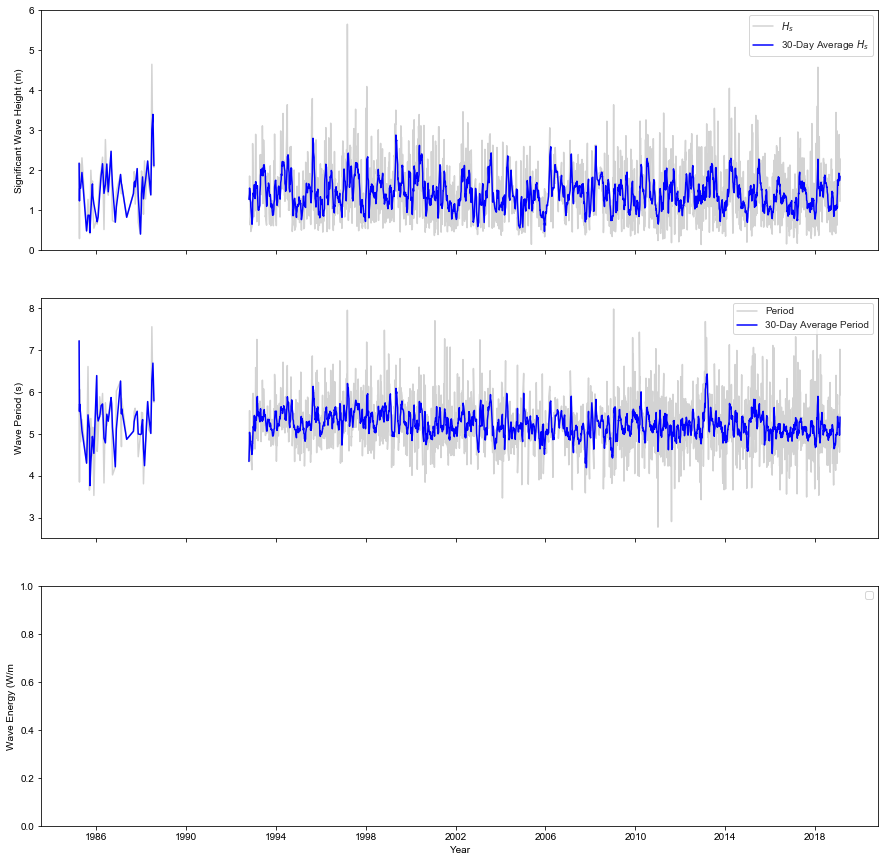

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    

sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
#ax3.plot(x1, time1)
#ax3.plot(x1,tt1)

#After date break
#ax3.plot(x2,time2)
#ax3.plot(x2,tt2)

ax3.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax3.set_ylabel("Wave Energy (W/m") #Check if watts/metre is correct


#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')

plt.savefig("Innisfail_timeseries")

In [29]:
for k in range(len(days)):
    if wh[k]>5:
        print wh[k], alltime[k]

5.654118061065674 1997-03-09 00:27:57.287942


In [33]:
for k in range(len(days)):
    if T[k]>7:
        print wh[k], alltime[k], T[k]

2.1770000457763667 1985-03-31 08:13:46.832721 7.218421169518095
4.651167392730713 1988-06-25 20:13:10.406247 7.55438930172712
1.054800033569336 1993-02-27 05:23:53.878907 7.251031320400107
5.654118061065674 1997-03-09 00:27:57.287942 7.947794289964777
3.821631908416748 1998-01-17 00:58:17.539165 7.188196055037728
1.1669999361038208 1998-10-31 14:15:35.536456 7.471015484727576
1.2774287462234497 1999-02-07 18:00:47.828125 7.115958779782
1.308000087738037 2001-01-30 01:28:51.349608 7.697298430607047
1.036428689956665 2001-07-07 17:05:04.417410 7.266594494628591
0.9443333745002748 2001-08-17 21:43:29.512151 7.071830458390569
0.8014000058174133 2001-10-04 22:51:43.678125 7.067503983548424
1.1776667833328247 2003-01-31 00:00:48.224201 7.242404809755702
3.6381582962839225 2009-01-13 08:17:04.857730 7.975708668017844
1.0576923076923077 2009-11-18 06:15:41.850413 7.295697236394595
1.2784287588936942 2010-03-07 07:59:33.872656 7.424756517792561
0.9838000615437824 2010-11-30 01:19:39.604837 7.03

In [31]:
df[380:500]

,date,period,period_rolling,wh,wh_rolling
380,1997-01-17 00:30:49.069436,5.386958,5.586515,1.894235,1.955975
381,1997-01-25 01:51:22.422217,5.306701,5.508864,0.833000,1.744771
382,1997-02-02 05:36:04.800031,5.119338,5.390140,1.330897,1.725563
383,1997-02-03 23:49:54.032894,5.056953,5.323416,1.241053,1.619431
384,1997-02-12 09:04:17.132810,5.848787,5.302682,1.019000,1.441826
385,1997-02-18 12:49:47.517464,5.589311,5.384218,1.749059,1.234602
386,1997-02-21 00:30:49.257468,6.322614,5.540617,2.289059,1.410345
387,1997-02-22 07:02:40.089228,5.558570,5.543182,1.152158,1.373461
388,1997-02-23 19:46:58.236020,5.717919,5.565024,2.517263,1.516436
389,1997-03-04 05:01:08.503195,6.421223,5.704339,1.595000,1.611686
